Create a linear regression model to anticipate used car prices and offer a collection of insights and recommendations to assist the firm in developing profitable strategies using differential pricing.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
used_cars_original = pd.read_csv('used_cars_data-1.csv')

used_cars = used_cars_original.copy()
used_cars

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


we have a total of 14 columns and 7253 rows

In [3]:
# check the overview information of the dataset
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [4]:
# check for duplicates
used_cars.duplicated().sum()

0

In [5]:
# check for null values
used_cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [6]:
# check out the numerical evaluation
used_cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [7]:
# view the statistical description of the categorical data
usedCarsObj = used_cars.select_dtypes(include = 'object')
usedCarsObj.describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


### Filling the null value in the Mileage column

In [8]:
# print entries with null values
used_cars[used_cars['Mileage'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


In [9]:
# check statistics of the Mileage column
used_cars['Mileage'].describe()

count          7251
unique          450
top       17.0 kmpl
freq            207
Name: Mileage, dtype: object

In [10]:
# fill null value with the mode
used_cars['Mileage'].fillna(used_cars['Mileage'].mode().iloc[0], inplace=True)

# convert km/kg to kmpl using the lambda function
used_cars['Mileage'] = used_cars['Mileage'].apply(lambda x: x*1.4 if 'km/kg' in used_cars['Mileage'].unique() else x)

# remove units from Mileage column
used_cars['Mileage'] = used_cars['Mileage'].str.replace(' km/kg', '').str.replace(' kmpl', '').astype(float)

# view the entries
used_cars['Mileage'].unique()

array([26.6 , 19.67, 18.2 , 20.77, 15.2 , 21.1 , 23.08, 11.36, 20.54,
       22.3 , 21.56, 16.8 , 25.2 , 12.7 ,  0.  , 13.5 , 25.8 , 28.4 ,
       20.45, 14.84, 22.69, 23.65, 13.53, 18.5 , 14.4 , 20.92, 17.5 ,
       12.8 , 19.01, 14.53, 11.18, 12.4 , 16.09, 14.  , 24.3 , 18.15,
       11.74, 22.07, 19.7 , 25.4 , 25.32, 14.62, 14.28, 14.9 , 11.25,
       24.4 , 16.55, 17.11, 22.9 , 17.8 , 18.9 , 15.04, 25.17, 20.36,
       13.29, 13.68, 20.  , 15.8 , 25.  , 16.4 , 24.52, 22.1 ,  8.5 ,
       15.1 , 16.95, 19.64, 16.5 , 18.53, 17.57, 18.  , 23.2 , 16.73,
       17.  , 13.  , 17.68, 22.7 , 16.2 , 15.26, 23.  , 19.83, 14.94,
       17.71, 14.74, 16.  , 22.32, 12.99, 23.3 , 19.15, 10.8 , 15.  ,
       22.  , 21.9 , 12.05, 11.7 , 21.21, 20.73, 24.07, 19.  , 20.58,
       19.27, 11.5 , 18.6 , 21.14, 11.05, 21.76,  7.81, 21.66, 17.2 ,
       20.63, 19.4 , 14.8 , 26.  , 20.4 , 21.5 , 15.3 , 17.9 , 16.6 ,
       22.54, 25.44, 13.7 , 22.48, 12.9 , 19.98, 21.4 , 19.81, 15.4 ,
       25.47, 19.87,

In [11]:
# sanity check to see if null value have been removed
used_cars[used_cars['Mileage'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


### Filling the null value in the Engine column

In [12]:
# check the description of the Engine column
used_cars['Engine'].describe()

count        7207
unique        150
top       1197 CC
freq          732
Name: Engine, dtype: object

In [13]:
# print the null values in the Engine column
used_cars[used_cars['Engine'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,4.550,1.93


In [14]:
# fill null value in Engine column with '0 cc' and convert the data type from string to integer by removing the S.I unit
used_cars['Engine'] = used_cars['Engine'].fillna('0 CC').str.replace(' CC', '').astype(int)

In [15]:
# sanity check
# check for all entries
used_cars['Engine'].unique()

array([ 998, 1582, 1199, 1248, 1968,  814, 1461, 2755, 1598, 1462, 1497,
       2179, 2477, 1498, 2143, 1995, 1984, 1197, 2494, 1798, 2696, 2698,
       1061, 1198, 2987,  796,  624, 1999, 1991, 2694, 1120, 2498,  799,
       2393, 1399, 1796, 2148, 1396, 1950, 4806, 1998, 1086, 1193, 2982,
       1493, 2967, 2993, 1196, 1799, 2497, 2354, 1373, 2996, 1591, 2894,
       5461, 1595,  936, 1997,    0, 1896, 1390, 1364, 2199,  993,  999,
       1405, 2956, 1794,  995, 2496, 1599, 2400, 1495, 2523,  793, 4134,
       1596, 1395, 2953, 1586, 2362, 1496, 1368, 1298, 1956, 1299, 3498,
       2835, 1150, 3198, 1343, 1499, 1186, 1590, 2609, 2499, 2446, 1978,
       2360, 3436, 2198, 4367, 2706, 1422, 2979, 1969, 1489, 2489, 1242,
       1388, 1172, 2495, 1194, 3200, 1781, 1341, 2773, 3597, 1985, 2147,
       1047, 2999, 2995, 2997, 1948, 2359, 4395, 2349, 2720, 1468, 3197,
       2487, 1597, 2771,   72, 4951,  970, 2925, 2200, 5000, 2149, 5998,
       2092, 5204, 2112, 1797, 2000, 1795, 3696, 13

### Filling the null value in the Power column

In [16]:
# see the entries with null value in the Power column
used_cars[used_cars['Power'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,NaN,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086,NaN,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,NaN,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,NaN,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,NaN,5.0,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364,NaN,5.0,8.525,NaN
6902,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,0,NaN,NaN,8.525,NaN
6947,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197,NaN,5.0,8.525,NaN
7092,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086,NaN,5.0,4.550,NaN


In [17]:
# print all unique entries to ensure consistent units
used_cars['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp', nan,
       '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp', '218 bhp',
       '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp', '82.85 bhp',
       '67 bhp', '241.4 bhp', '35 bhp',

In [18]:
"""
fill null value in Power column with '0 bhp' and convert the data type 
from string to float by removing the S.I unit and then converting to float.
"""
used_cars['Power'] = used_cars['Power'].fillna('0 bhp').str.replace(' bhp', '').astype(float)

In [19]:
# sanity check
# check all unique entries in Power column
used_cars['Power'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,   0.   , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

### Filling the null value in the Seat column

In [20]:
# see the entries with nullvalue in the seat column
used_cars[used_cars['Seats'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,0,0.0,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,0,0.0,NaN,7.880,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498,99.0,NaN,7.650,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,0,0.0,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,0,0.0,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,0,0.0,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,0,0.0,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,0,0.0,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,0,0.0,NaN,120.000,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493,100.0,NaN,13.580,1.70


In [21]:
# check the statistical evaluation of Seats column
used_cars['Seats'].describe()

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [22]:
# fill the null value in Seats column with the median

used_cars['Seats'].fillna(used_cars['Seats'].median(), inplace = True)

In [23]:
# sanity check
# check if there are still entries with nullvalue in the seat column
used_cars[used_cars['Seats'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


### Filling the null value in the Price column


In [24]:
# print entries with null value in price column
used_cars[used_cars['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4.0,4.360,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5.0,4.360,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,25.270,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,0.00,5.0,8.525,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5.0,10.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,13.230,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,10.150,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,9.470,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5.0,10.150,NaN


In [25]:
# check the description of the price column
used_cars['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [26]:
# replace null value in price with 0
used_cars['Price'].fillna(0, inplace = True)

In [27]:
# sanity check 
used_cars[used_cars['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


### Check if the null values in the dataset has been cleaned

In [28]:
# sanity check
used_cars.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

There are no null values in the data set

In [29]:
# check for the datatype 
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   float64
 9   Engine             7253 non-null   int32  
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              7253 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 765.1+ KB


Power and Mileage have been converted to float datatype and Engine converted to integer

### Check for empty string and incosistencies

In [30]:
# for transmission
used_cars['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [31]:
# for Location
used_cars['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [32]:
# for year
used_cars['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996], dtype=int64)

In [33]:
# for fuel_type
used_cars['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [34]:
# for Owner_type
used_cars['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [35]:
# for kilometers_driven
used_cars['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 89411, 52262, 72443], dtype=int64)

In [36]:
# for Name
sorted(used_cars['Name'].unique())

['Ambassador Classic Nova Diesel',
 'Audi A3 35 TDI Attraction',
 'Audi A3 35 TDI Premium',
 'Audi A3 35 TDI Premium Plus',
 'Audi A3 35 TDI Technology',
 'Audi A4 1.8 TFSI',
 'Audi A4 1.8 TFSI Technology Edition',
 'Audi A4 2.0 TDI',
 'Audi A4 2.0 TDI 177 Bhp Premium Plus',
 'Audi A4 2.0 TDI 177 Bhp Technology Edition',
 'Audi A4 2.0 TDI Celebration Edition',
 'Audi A4 2.0 TDI Multitronic',
 'Audi A4 2.0 TDI Premium Sport Limited Edition',
 'Audi A4 2.0 TFSI',
 'Audi A4 3.0 TDI Quattro',
 'Audi A4 3.0 TDI Quattro Premium',
 'Audi A4 3.2 FSI Tiptronic Quattro',
 'Audi A4 30 TFSI Premium Plus',
 'Audi A4 35 TDI Premium',
 'Audi A4 35 TDI Premium Plus',
 'Audi A4 35 TDI Premium Sport',
 'Audi A4 35 TDI Technology',
 'Audi A4 35 TDI Technology Edition',
 'Audi A4 New 2.0 TDI Multitronic',
 'Audi A6 2.0 TDI Design Edition',
 'Audi A6 2.7 TDI',
 'Audi A6 2.8 FSI',
 'Audi A6 2011-2015 2.0 TDI',
 'Audi A6 2011-2015 2.0 TDI Premium Plus',
 'Audi A6 2011-2015 2.0 TDI Technology',
 'Audi A6 2011

There are no inconsistencies nor empty strings

In [37]:
# veiw cleaned dataset
used_cars

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5.0,13.23,0.00
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5.0,10.15,0.00
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,5.0,9.47,0.00
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5.0,10.15,0.00


### Data Visualization: Univariate Analysis

In [38]:
# create a function univariate visualization of any feature in the dataset using a boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

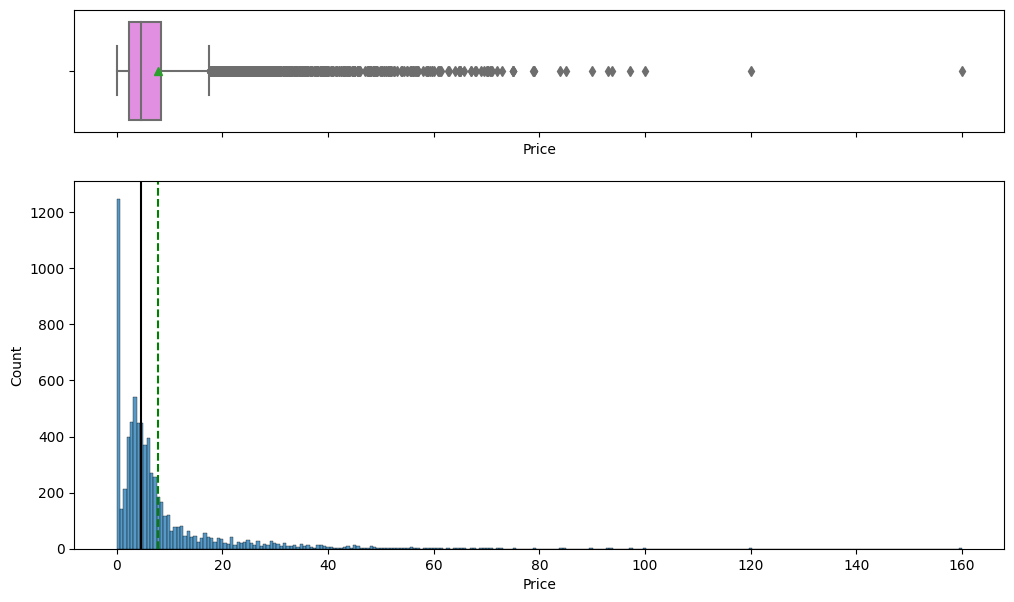

In [39]:
# visualization for the price feature
histogram_boxplot(data =used_cars, feature = 'Price')

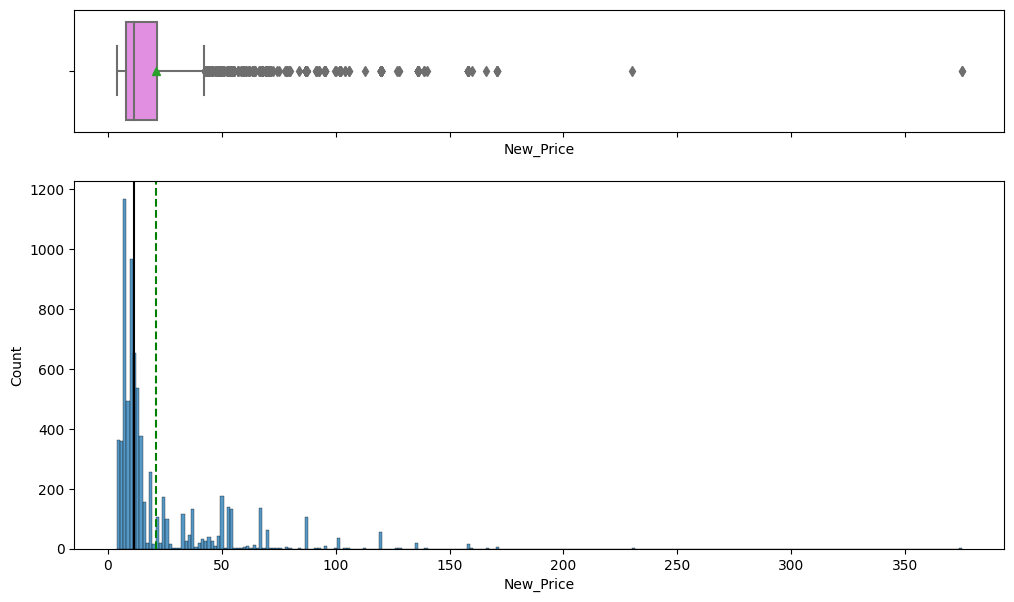

In [40]:
# visualization for the New_price feature
histogram_boxplot(data =used_cars, feature = 'New_Price')

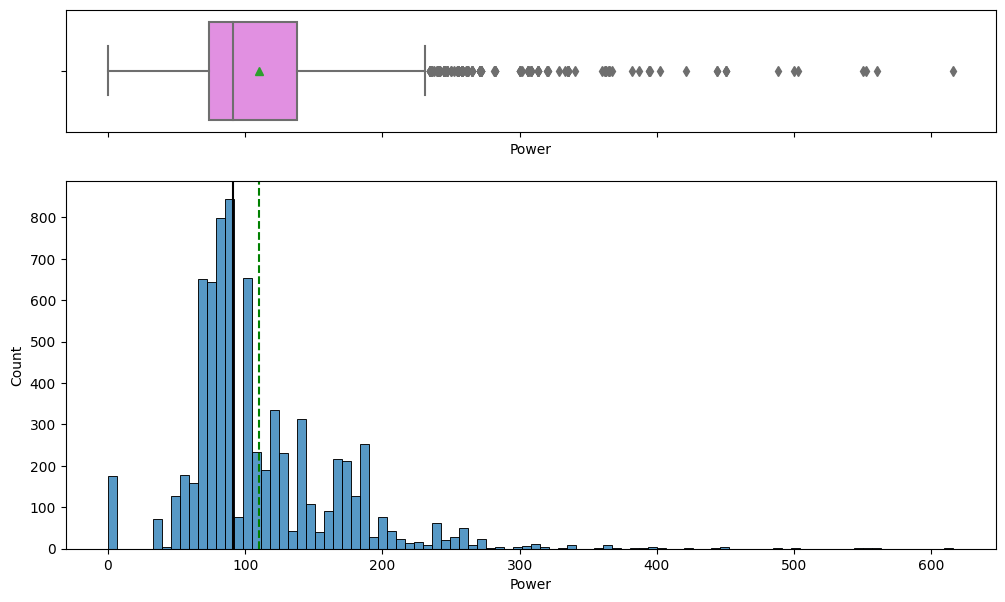

In [41]:
# visualization for the Power feature
histogram_boxplot(data =used_cars, feature = 'Power')

With the visuals of these 3 features; Price, New_price and Power column, we observe an uneven distribution, that is the dataset is right skewed

### Bivariate Analysis

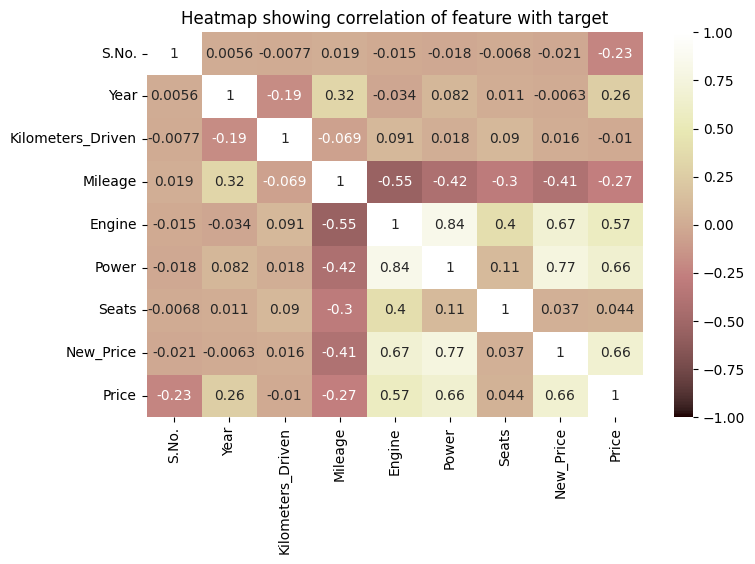

In [42]:
# plot the correlation of the numeric features in the data set with a heatmap

# get the numeric columns and assign to a variable
used_cars_numeric = used_cars.select_dtypes(include = 'number')

# get the correlation of the numeric columns
used_cars_numeric_corr = used_cars_numeric.corr()

# plot the heatmap 
plt.figure(figsize = (8, 5))
sns.heatmap(used_cars_numeric_corr, annot = True, vmin = -1, vmax = 1, cmap = 'pink')
plt.title('Heatmap showing correlation of feature with target');

- Seeing that the target is the price, observation on the features that are correlated with the price includes; Power with 0.66, New price with 0.66 and Engine with 0.57. They have a positive correlation but not really a strong correction
- There is also a strong correlation between ENgine and Power, power and New price that can result in multicollinearity

### Visualization to check for linear relationship between target and features
Although the model to be design has been stated to be a linear model, bivariate plots will be used to see if there be any linear relationship between the features in the dataset

In [43]:
# defined a function to create scatterplot between two numeric variable
def custom_scatterplot(x,y, title, data = used_cars): 
    plt.figure(figsize = (6, 4))
    sns.scatterplot(x = x, y = y, data = used_cars)
    plt.title(title)
    plt.show()

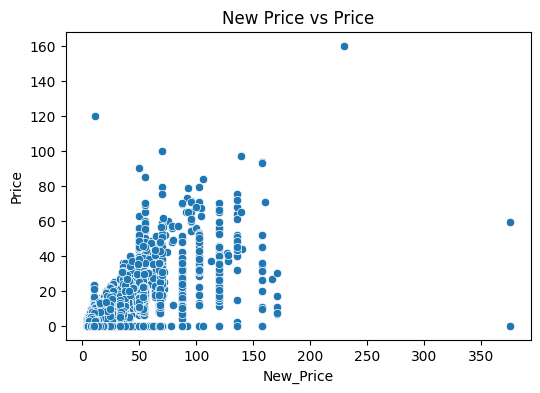

In [44]:
custom_scatterplot( x = 'New_Price', y = 'Price', title = 'New Price vs Price')

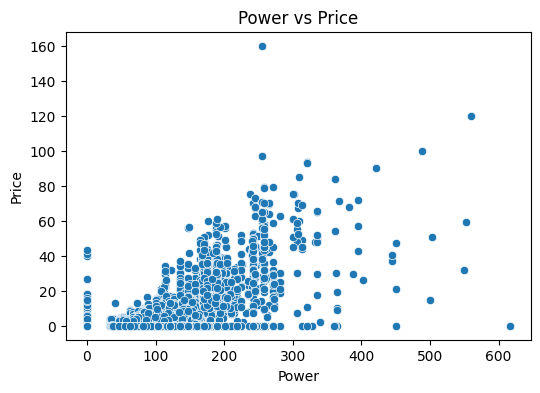

In [45]:
custom_scatterplot( x = 'Power', y = 'Price', title = 'Power vs Price')

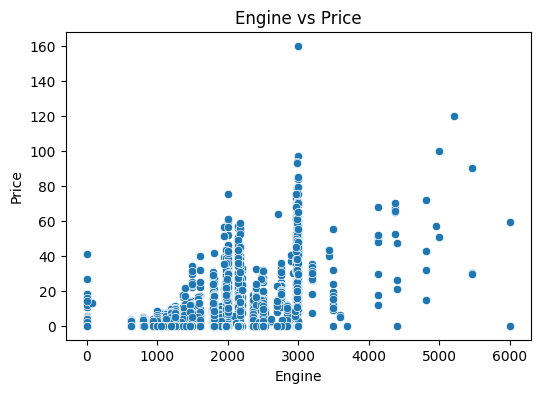

In [46]:
custom_scatterplot( x = 'Engine', y = 'Price', title = 'Engine vs Price')

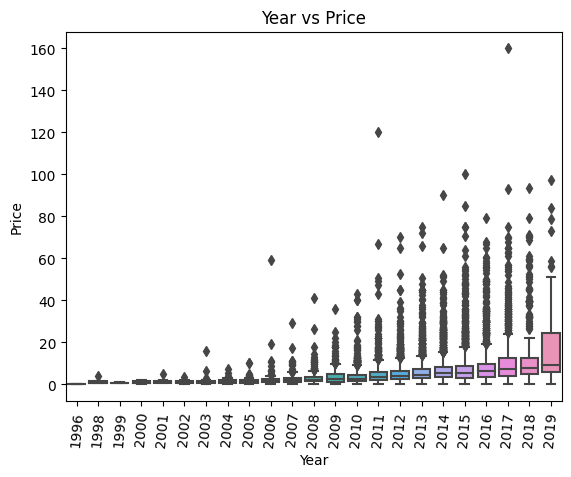

In [47]:
sns.boxplot(x = 'Year', y = 'Price', data = used_cars)
plt.xticks(rotation = 85)
plt.title('Year vs Price');

As the heatmap tells the is a linear relationship between the the feature and the target but not very strong, as the Engine is increasing the is also an increase in the Price, this is similar for both New Price and Power variable

### Detecting outliers using boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

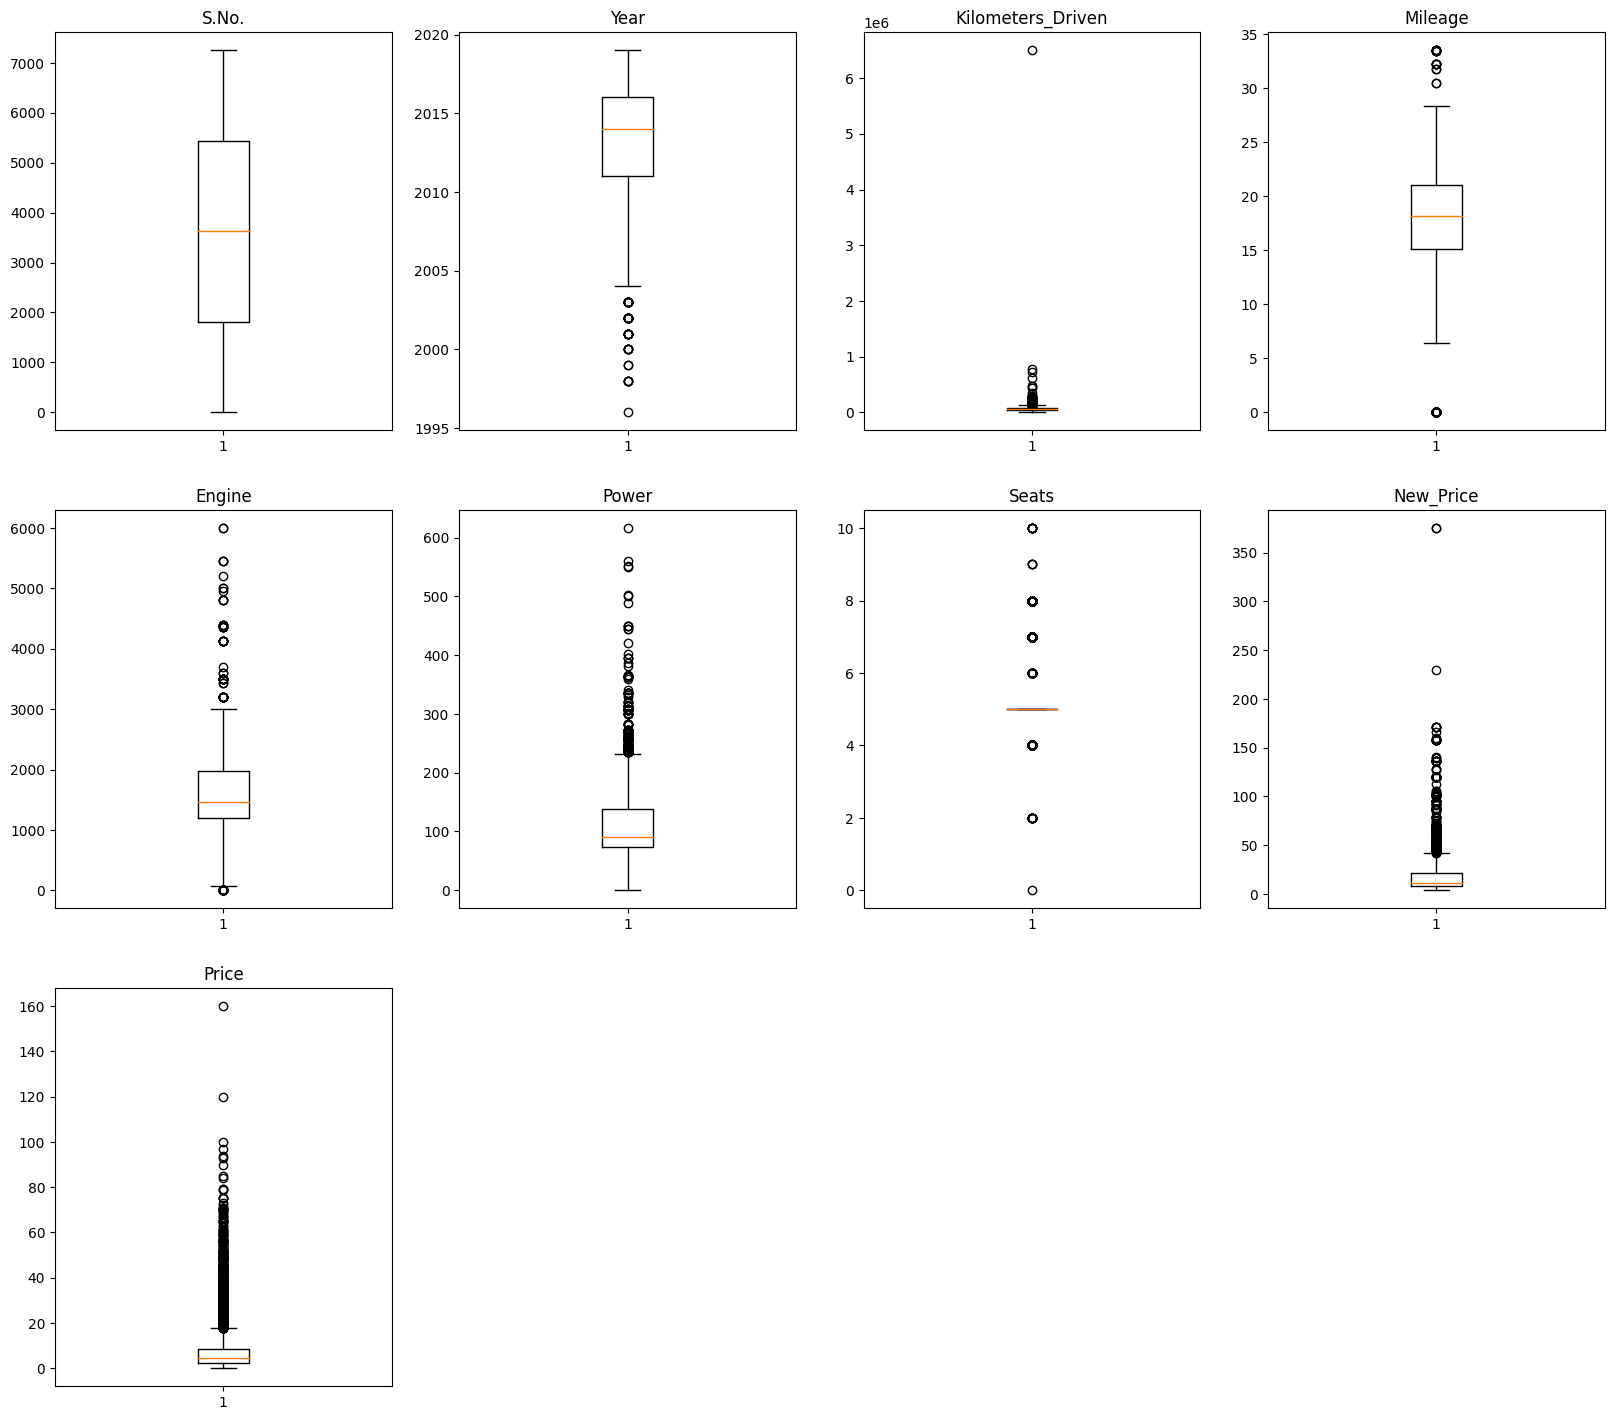

In [48]:
# outlier detection using boxplot
plt.figure(figsize = (20, 30))

for i, variable in enumerate(used_cars_numeric):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(used_cars[variable])
    plt.title(variable)
plt.show

In [49]:
# remove target from the numeric variables
used_cars_numeric.drop('Price', axis = 1, inplace = True)
used_cars_numeric.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [50]:
# define a function to treat outliers
'''
Treating the outlier by assigning the values of the higher whisker to the outliers 
towards that end and also assigning the values of the lower whisker to the outliers towards the lower end
'''
def treat_outliers(used_cars, col):
    '''
    treat outliers in variable
    col: str, name of the numerical variable
    used_cars: dataframe
    '''
    
    Q1 = used_cars[col].quantile(0.25) #25th percentile
    Q3 = used_cars[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    used_cars[col] = np.clip(used_cars[col], lower_whisker, upper_whisker)
    return used_cars


def treat_outliers_all(used_cars, col_list):
    for c in col_list:
        used_cars = treat_outliers(used_cars, c)
    return used_cars

In [51]:
# call function to treat outliers
used_cars = treat_outliers_all(used_cars, used_cars_numeric)

<function matplotlib.pyplot.show(close=None, block=None)>

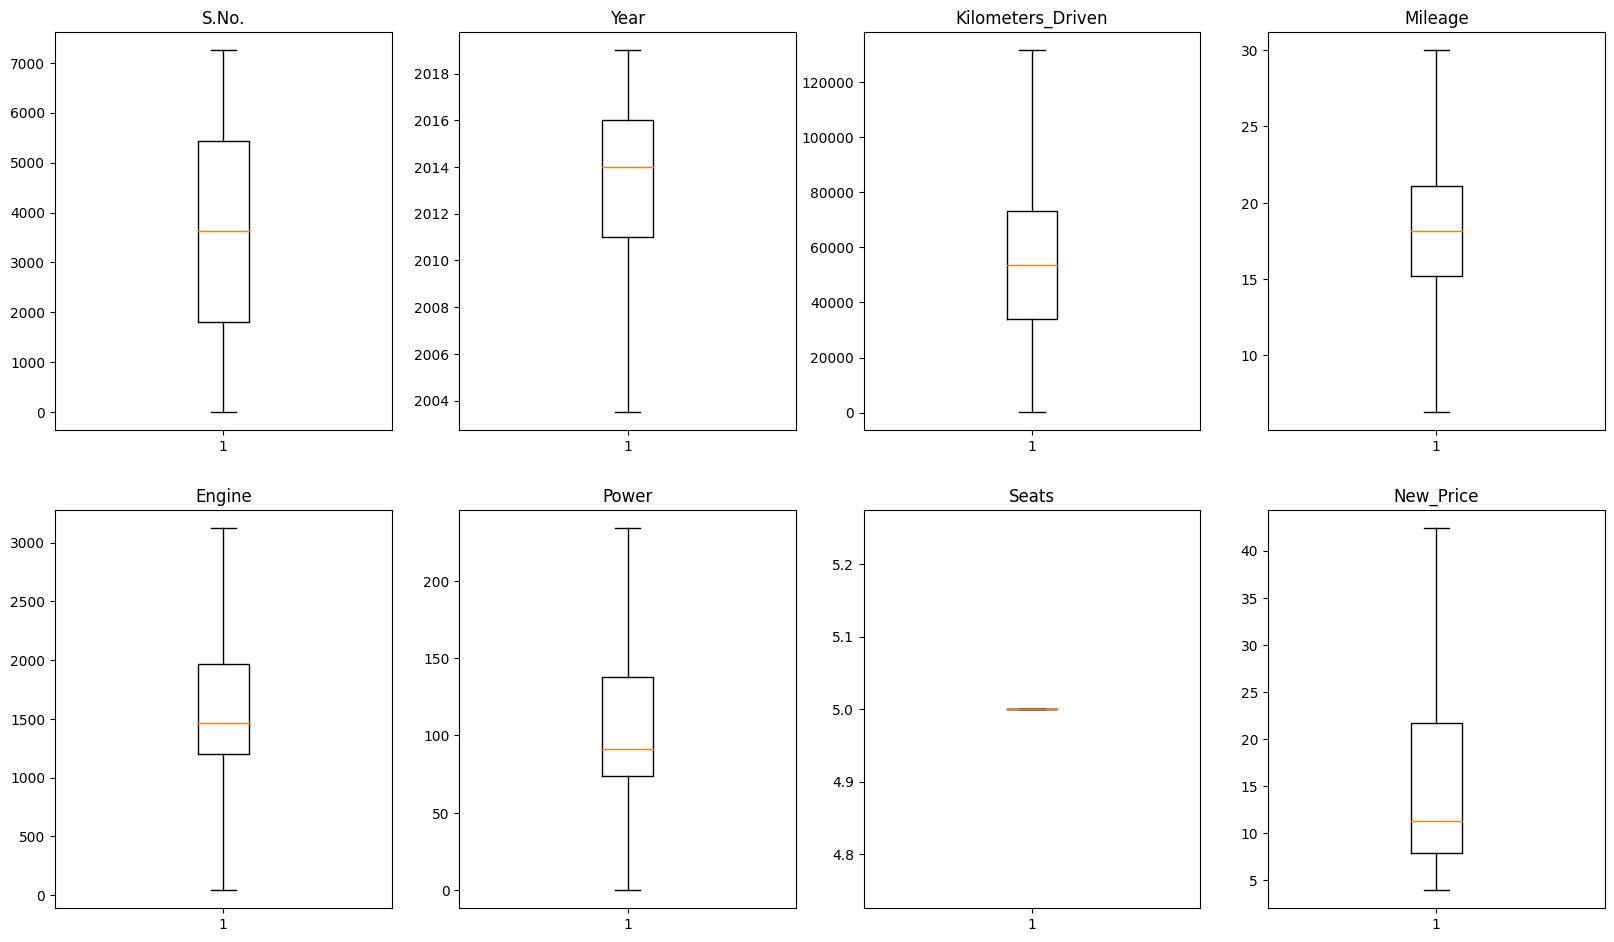

In [52]:
# outlier detection using boxplot
plt.figure(figsize = (20, 30))

for i, variable in enumerate(used_cars_numeric):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(used_cars[variable], whis = 1.5)
    plt.title(variable)
plt.show

### Model Building

C:\Users\USER1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


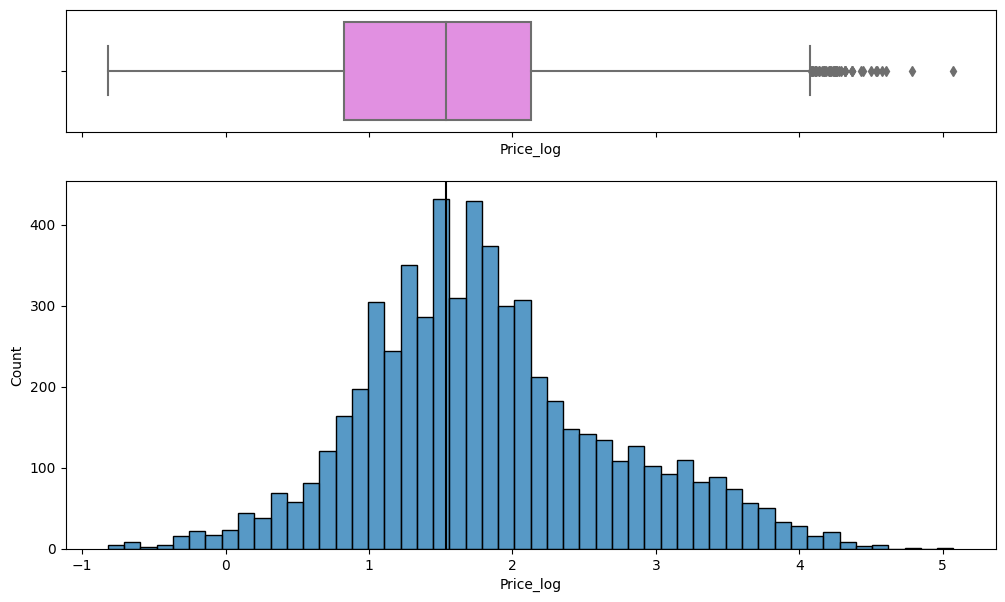

In [53]:
# transform target using log transformation.. log tansformation help make a skewed variable approximately normal

used_cars['Price_log'] = np.log(used_cars['Price']) # to retain the original global sales

# check the visualization again
histogram_boxplot(data = used_cars, feature = 'Price_log')

The distribution is no more sweked as it was initially, the mean and median are on the same line, meaning the mean and the median are similar or the same and this satisfy the assumption of normality

In [54]:
# import required libraries to build model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [55]:
#select the features to be used to train the model
X = used_cars[['Year',  'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 
                'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']]

y = used_cars['Price'] 

In [56]:
X.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [57]:
X = pd.get_dummies(X, drop_first= True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010.0,72000,26.60,998.0,58.16,5.0,5.510,0,0,0,0,1,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,5.0,16.060,1,0,0,0,1,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,5.0,8.610,0,0,0,1,1,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,5.0,11.270,1,0,0,0,1,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,5.0,42.405,1,0,0,0,0,0,1,0


In [58]:
# split data into training, validation and testing, 80 percent for training and validation and 20 percent for testing


x_temporal, x_test, y_temporal, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

x_train, x_val, y_train, y_val = train_test_split(x_temporal, y_temporal, test_size= 0.2, random_state= 0)

In [59]:
x_train.shape

(4641, 15)

In [60]:
x_test.shape

(1451, 15)

In [61]:
x_val.shape

(1161, 15)

### Normalize dataset

In [62]:
'''
The fit calcualtes the mean and standard deviation of each varaible, 
tranform uses the calculated mean and standatd deviation to transform 
the data so the mean will be shifted toward zero and standard deviation toward one
'''
scaler = StandardScaler()
x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [63]:
# build model
# create an instance of the model
linear_model = LinearRegression()

# build the model by calling .fit()
linear_model.fit(x_train_sd, y_train)

LinearRegression()

### Evaluate Model performance

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Adjusted r2 job is to penalize the model for incresing 
# the performance for unimportant variable, it is lower than
# the r2 and more reliable


In [65]:
# define a function that computes the evaluation of the model

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))



# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    '''
    Function to compute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variables
    '''
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred) # to compute R - squared
    adjr2 = adj_r2_score(predictors, target, pred)   # to compute adjusted R-squared
    mse = mean_squared_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  #to compute MAE
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
        },
        index = [0]
    )
    
    return df_perf

In [66]:
# call function
trained_linear_model= model_performance_regression(linear_model, x_train_sd, y_train)
trained_linear_model

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,60.442128,7.774454,4.196521,0.500254,0.498634


The r2 interpretation means that 50 percent of the variation in the global sales was explained by all the individual variable in the data, and the error margine of this model is high, meaning the model's performance is not really good
- The closer the values of the error is to zero, the better the model is doing, the higher the value of the error, the more mistake

In [67]:
linearModel_val = model_performance_regression(linear_model, x_val_sd, y_val)
linearModel_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,55.090387,7.42229,4.234921,0.487878,0.481169


The model is not overfitting as it performs a little better on the validation set, which results in little reduction of the evaluation error, so use of regularization is not necessary

In [68]:
for i, col in enumerate(x_train.columns): 
    print(f'{col} has coefficient of {linear_model.coef_[i]}')

Year has coefficient of 2.222885135856658
Kilometers_Driven has coefficient of -1.249909697004463
Mileage has coefficient of -0.39141509033370514
Engine has coefficient of 1.1702022305876951
Power has coefficient of 1.6852867245088334
Seats has coefficient of 0.0
New_Price has coefficient of 3.983068120110613
Fuel_Type_Diesel has coefficient of -0.684981186721916
Fuel_Type_Electric has coefficient of 0.09126401365837868
Fuel_Type_LPG has coefficient of 0.04985889646551055
Fuel_Type_Petrol has coefficient of -1.063097215064517
Transmission_Manual has coefficient of -0.605905475353714
Owner_Type_Fourth & Above has coefficient of 0.12643192377106274
Owner_Type_Second has coefficient of 0.0664281533449107
Owner_Type_Third has coefficient of 0.19603179856767716


### Interpretation

- The higher the year of the car, the price will increase by 2.22 times         
-  The higher the kilometers driven, the price will decrease by -1.25 times

### Using Ridge regression to Apply regularization

In [69]:
from sklearn.linear_model import Ridge

# create an instance, # set a seed; ie random state and regularization to 1.5
ridgeModel = Ridge(random_state= 0, alpha= 1.5)

# fit model
ridgeModel.fit(x_train_sd, y_train)

Ridge(alpha=1.5, random_state=0)

In [70]:
# check perfermance of ridge regression on training  data
ridgeModel_train = model_performance_regression(ridgeModel, x_train_sd, y_train)
ridgeModel_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,60.442142,7.774454,4.19641,0.500254,0.498634


In [71]:
# check the coefficient on the validation set 
ridgeModel_val = model_performance_regression(ridgeModel, x_val_sd, y_val)
ridgeModel_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,55.089247,7.422213,4.234831,0.487889,0.48118


### TRY A DIFFERENT VALUE OF ALPHA
If the alpha value is zero (0) is same as just doing a linear regression model.
- Alpha makes lasso and ridge linear regression model different the normal linear regression

In [72]:
alpha_values = np.linspace(0.2, 5, num = 10)

for alpha in alpha_values:
    ridgeModel = Ridge(random_state= 0, alpha= alpha)
    ridgeModel.fit(x_train_sd, y_train)
    ridgeModel_train = model_performance_regression(ridgeModel, x_train_sd, y_train)
    print(ridgeModel_train)

         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442129  7.774454  4.196506   0.500254        0.498634
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442132  7.774454  4.196467   0.500254        0.498634
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442138  7.774454  4.196427   0.500254        0.498634
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442148  7.774455  4.196389   0.500254        0.498633
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442161  7.774456  4.196354   0.500254        0.498633
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442178  7.774457  4.196321   0.500254        0.498633
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.442197  7.774458  4.196289   0.500254        0.498633
        MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.44222  7.774459  4.196258   0.500254        0.498633
         MSE      RMSE       MAE  R-square

Upon trying different values from 0.2 to 5 but the r squared are all the same, maybe this the best ridge can do. that meansridge could not imporove on the performance on the linear regression

### Using Lasso Regression
The difference between the ridge and lasso is that the laasso changes the coefficient of the variable to zero not shrinking the coefficient of unimportant variable to close to zero like ridge does in the model building process

In [73]:
# import lasso algorithm
from sklearn.linear_model import Lasso


alpha_values = np.linspace(0.01, 0.1, num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state= 0, alpha= alpha)
    lasso.fit(x_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd, y_train)
    print(lasso_train)
    print(alpha)

         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.453411  7.775179  4.189994   0.500161         0.49854
0.01
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.463903  7.775854  4.185443   0.500074        0.498453
0.020000000000000004
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.470273  7.776263  4.181129   0.500022          0.4984
0.030000000000000006
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.479053  7.776828  4.176978   0.499949        0.498327
0.04000000000000001
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.488059  7.777407  4.173208   0.499875        0.498253
0.05000000000000001
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.499069  7.778115  4.169664   0.499784        0.498161
0.06000000000000001
         MSE      RMSE       MAE  R-squared  Adj. R-squared
0  60.512082  7.778951  4.166243   0.499676        0.498053
0.07
         MSE      RMSE       MAE  R-squared  Adj

In [74]:
# build lasso model based on the suitable regression model
lasso = Lasso(random_state= 0, alpha= 0.001)
lasso.fit(x_train_sd, y_train)
lasso_train = model_performance_regression(lasso, x_train_sd, y_train)
lasso_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,60.442241,7.774461,4.195768,0.500253,0.498633


### Feature selection
The objective here is not to improve the performance but to get similar values of the r squared and adjusted r squared, using the forward feature selection and this can be done with machine learning extension mlxtend


In [75]:
!pip install mlxtend


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
# we are applying this feature selection on any of the model

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# using the linear regression model

reg = LinearRegression()

# build the forward feature selection
'''
shape will give you the number of rows and column
forward is true because we are doing forward selection, otherwise false(if backward)
verbose is to display or print on the screen
scoring is the metrics we want to monitor, which is the r2 to check the performance of the model with lesser variables
n_job means to use all the cpu cores because this process takes time, -1 means use everything
we are seeing how each feature is contributing to the training performance
'''
sfs = SFS(reg, k_features = x_train.shape[1], forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.6s finished

[2023-05-10 04:01:19] Features: 1/15 -- score: 0.40026006196815345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2023-05-10 04:01:19] Features: 2/15 -- score: 0.4703127919382558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2023-05-10 04:01:19] Features: 3/15 -- score: 0.4865767572991251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2023-05-10 04:01:19] Features: 4/15 -- score: 0.4

We see that after the Sixth feature there isn't any significant change, so using 6 features, the model will be rebuilt

Text(0.5, 1.0, 'Sequential Forward Selection')

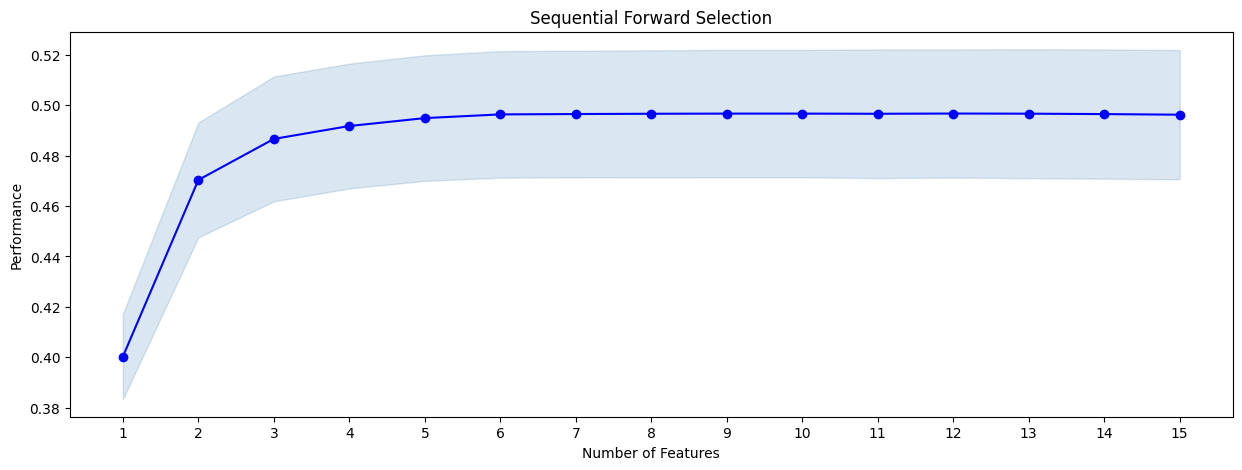

In [77]:
# show the contribution of each feature using a plot
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind = 'std_err', figsize = (15, 5))
plt.title('Sequential Forward Selection')

The visualization shows the difference in the contribution of each feature, althogh the contribution of the 5th and 6th feature is small, however the following features contribution are insignificant

In [78]:
sfs = SFS(reg, k_features = 6, forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)

sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2023-05-10 04:01:21] Features: 1/6 -- score: 0.40026006196815345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2023-05-10 04:01:21] Features: 2/6 -- score: 0.4703127919382558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2023-05-10 04:01:21] Features: 3/6 -- score: 0.4865767572991251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2023-05-10 04:01:21] Features: 4/6 -- score: 0.49169

In [79]:
# get important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 = x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

# print important features
x_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'New_Price',
       'Transmission_Manual'],
      dtype='object')

In [80]:
# now we normalize the new data which contains just 13 columns
x_train2_sd = scaler.fit_transform(x_train2)
x_test2_sd = scaler.transform(x_test2)
x_val2_sd = scaler.transform(x_val2)

In [81]:
# rebuild the linear regression
linearModel_2 = LinearRegression()

linearModel_2.fit(x_train2_sd, y_train)

LinearRegression()

In [82]:
# train model using the 6 features
linearModel_2_train = model_performance_regression(linearModel_2, x_train2_sd, y_train)
linearModel_2_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,60.631505,7.786623,4.20481,0.498689,0.49804


In [83]:
# 
linearModel_2_val = model_performance_regression(linearModel_2, x_val2_sd, y_val)
linearModel_2_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,55.329355,7.43837,4.241883,0.485657,0.482983


This performance of the r2 remained using just 6 features so the best performing or morst contributing features have been selected.

In [85]:
# pass the test data to the model
linearModel_2_test = model_performance_regression(linearModel_2, x_test2_sd, y_test)
linearModel_2_test

,MSE,RMSE,MAE,R-squared,Adj. R-squared
0,48.080193,6.933988,3.986346,0.561417,0.559594


### Final Note
The performance of the model improved on the the test data, Nevertheless this model should not be deployed because of the low performance, other regression models should be tried to see which model is best for the price prediction